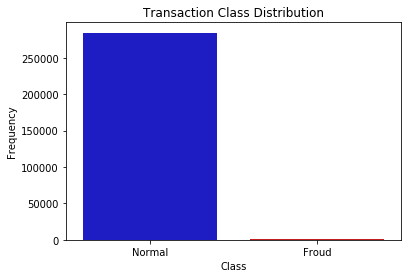

dataset null values:  False
The Normal transactions are:  (284315, 31)
The Fraud transactions are:  (492, 31)


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

NUM_EPOCHS = 5
NUM_BATCH = 10
INPUT_DIMENSION = 30

######### PRE PROCESSING DATA #########

COLORS = ["#0101DF", "#DF0101"]

# load the dataset
dataset = pd.read_csv('creditcard_froud.csv', sep=',')

# plot transaction class distribution
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
sns.countplot('Class', data=dataset, palette=COLORS)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ["Normal", "Froud"])
plt.xlabel("Class")
plt.ylabel("Frequency");
plt.show()

# check NULL data
print('dataset null values: ', dataset.isnull().values.any())

Normal = dataset[dataset['Class']==0]
print('The Normal transactions are: ', Normal.shape)

Fraud = dataset[dataset['Class']==1]
print('The Fraud transactions are: ', Fraud.shape)

Counter({0: 284315, 1: 492})


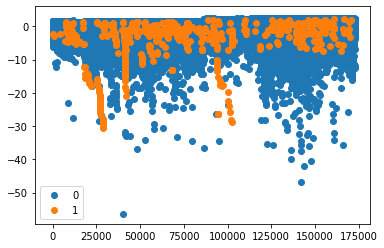

In [46]:
################ CLASS DISTRIBUTION #####################

from collections import Counter
from numpy import where

X = dataset.drop('Class', axis=1)
y = dataset['Class']

# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.show()


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


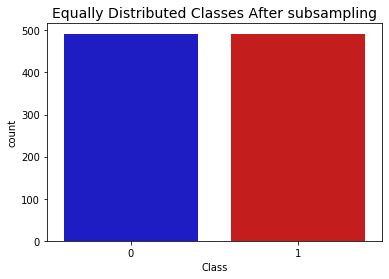

In [47]:
################# EXAMPLE OF UNDERSAMPLING ##################

# we take the same amount of "frauds", 492
fraud_df = dataset.loc[dataset['Class'] == 1]
non_fraud_df = dataset.loc[dataset['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

print('\nDistribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=COLORS)
plt.title('Equally Distributed Classes After subsampling', fontsize=14)
plt.show()

Counter({0: 284315, 1: 284315})


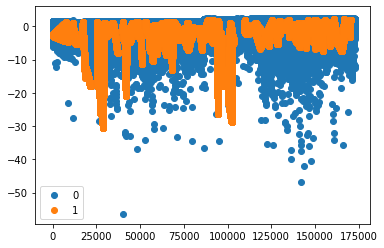

In [48]:
################ EXAMPLE of OVERSAMPLING: SMOTE ###############

# Application of SMOTE algorithm

from imblearn.over_sampling import SMOTE

X = dataset.drop('Class', axis=1)
y = dataset['Class']

sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm, ysm = sm.fit_sample(X, y)

counter = Counter(ysm)
print(counter)

for label, _ in counter.items():
    row_ix = where(ysm == label)[0]
    plt.scatter(Xsm.iloc[row_ix, 0], Xsm.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.show()

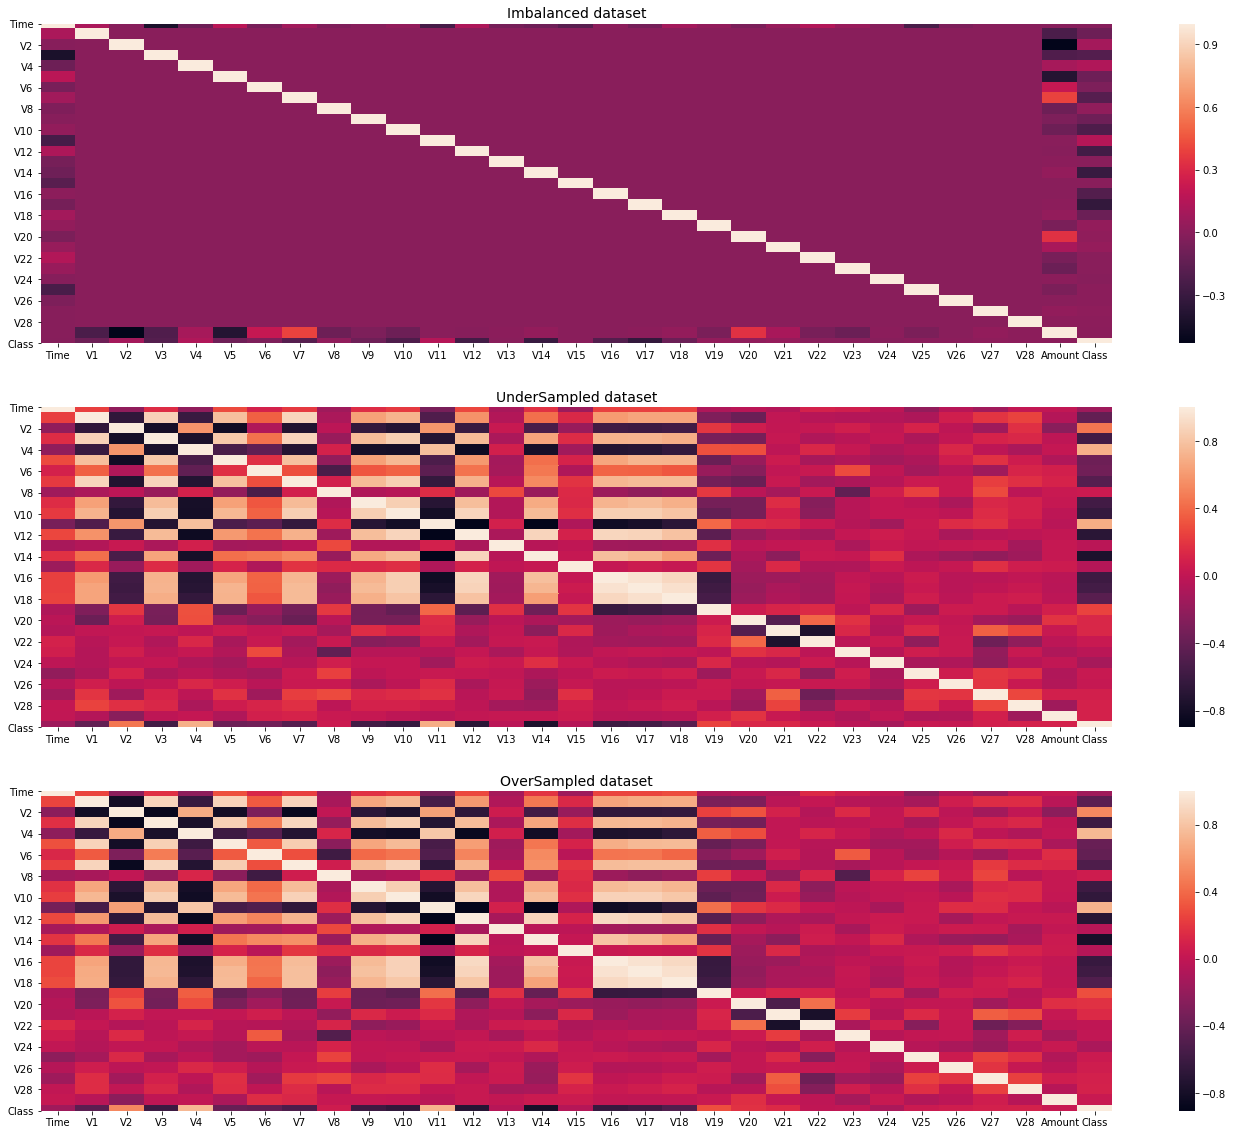

In [50]:
################ CORRELATION MATRIX #####################

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(24,20))

# Initial dataset
corr = dataset.corr()
sns.heatmap(corr, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced dataset", fontsize=14)

# Undersample
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, annot_kws={'size':20}, ax=ax2)
ax2.set_title('UnderSampled dataset', fontsize=14)

# Oversample
over_sample_df = Xsm
over_sample_df = over_sample_df.assign(Class=ysm)
over_sample_corr = over_sample_df.corr()
sns.heatmap(over_sample_corr, annot_kws={'size':20}, ax=ax3)
ax3.set_title('OverSampled dataset', fontsize=14)

plt.show()

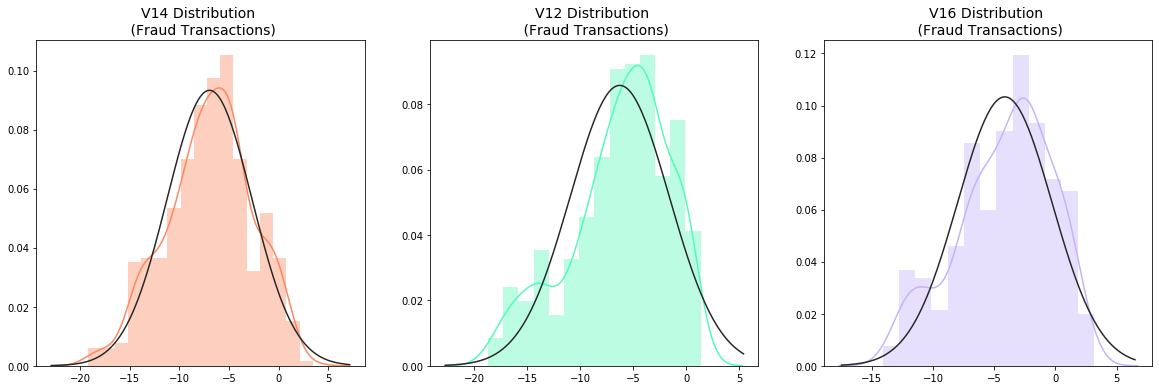

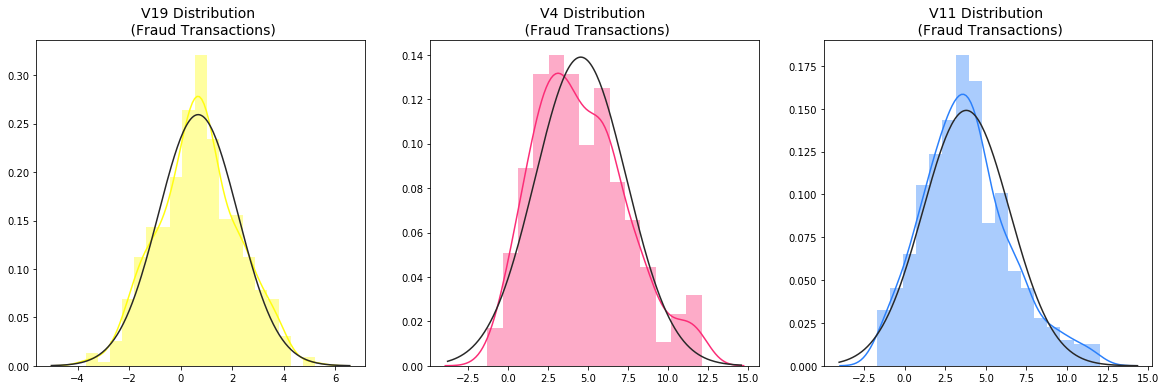

In [51]:
###################### OUTLIER REMOVAL ########################

from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_fraud_dist = dataset['V14'].loc[dataset['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = dataset['V12'].loc[dataset['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v16_fraud_dist = dataset['V16'].loc[dataset['Class'] == 1].values
sns.distplot(v16_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V16 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

f, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(20, 6))

v19_fraud_dist = dataset['V19'].loc[dataset['Class'] == 1].values
sns.distplot(v19_fraud_dist,ax=ax4, fit=norm, color='#fffd12')
ax4.set_title('V19 Distribution \n (Fraud Transactions)', fontsize=14)

v4_fraud_dist = dataset['V4'].loc[dataset['Class'] == 1].values
sns.distplot(v4_fraud_dist,ax=ax5, fit=norm, color='#fb2d77')
ax5.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)

v11_fraud_dist = dataset['V11'].loc[dataset['Class'] == 1].values
sns.distplot(v11_fraud_dist,ax=ax6, fit=norm, color='#2b80fb')
ax6.set_title('V11 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [54]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)

# outlier removed dataset
out_rem_ds = dataset

# Gaussian Distribution Features

v14_fraud = dataset['V14'].loc[dataset['Class'] == 1].values
# calculate statistics
data_mean, data_std = mean(v14_fraud), std(v14_fraud)
cut_off = data_std * 2.5
v14_lower, v14_upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Identified V14 outliers: %d' % len(outliers))
new_v14_fraud = [x for x in v14_fraud if x >= v14_lower and x <= v14_upper]
print('Non-outlier V14 observations: %d' % len(new_v14_fraud))

# remove outliers
out_rem_ds = out_rem_ds.drop(out_rem_ds[(out_rem_ds['V14'] > v14_upper) | (out_rem_ds['V14'] < v14_lower)].index)
print(out_rem_ds.shape)

v19_fraud = dataset['V19'].loc[dataset['Class'] == 1].values
# calculate statistics
data_mean, data_std = mean(v19_fraud), std(v19_fraud)
cut_off = data_std * 2.5
v19_lower, v19_upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in v19_fraud if x < v19_lower or x > v19_upper]
print('Identified V19 outliers: %d' % len(outliers))
new_v19_fraud = [x for x in v19_fraud if x >= v19_lower and x <= v19_upper]
print('Non-outlier V19 observations: %d' % len(new_v19_fraud))

# remove outliers
out_rem_ds = out_rem_ds.drop(out_rem_ds[(out_rem_ds['V19'] > v19_upper) | (out_rem_ds['V19'] < v19_lower)].index)
print(out_rem_ds.shape)

v11_fraud = dataset['V11'].loc[dataset['Class'] == 1].values
# calculate statistics
data_mean, data_std = mean(v11_fraud), std(v11_fraud)
cut_off = data_std * 2.5
v11_lower, v11_upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
print('Identified V11 outliers: %d' % len(outliers))
new_v11_fraud = [x for x in v11_fraud if x >= v11_lower and x <= v11_upper]
print('Non-outlier V11 observations: %d' % len(new_v11_fraud))

# remove outliers
out_rem_ds = out_rem_ds.drop(out_rem_ds[(out_rem_ds['V11'] > v11_upper) | (out_rem_ds['V11'] < v11_lower)].index)
print(out_rem_ds.shape)


# Interquartile Range Method

v12_fraud = dataset['V12'].loc[dataset['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
print(outliers)

# remove outliers
out_rem_ds = out_rem_ds.drop(out_rem_ds[(out_rem_ds['V12'] > v12_upper) | (out_rem_ds['V12'] < v12_lower)].index)
print(out_rem_ds.shape)

v16_fraud = dataset['V16'].loc[dataset['Class'] == 1].values
q25, q75 = np.percentile(v16_fraud, 25), np.percentile(v16_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v16_iqr = q75 - q25
print('iqr: {}'.format(v16_iqr))
v16_cut_off = v16_iqr * 1.5
v16_lower, v16_upper = q25 - v12_cut_off, q75 + v16_cut_off
print('Cut Off: {}'.format(v16_cut_off))
print('V16 Lower: {}'.format(v16_lower))
print('V16 Upper: {}'.format(v16_upper))
outliers = [x for x in v16_fraud if x < v16_lower or x > v16_upper]
print('Feature V16 Outliers for Fraud Cases: {}'.format(len(outliers)))
print(outliers)

# remove outliers
out_rem_ds = out_rem_ds.drop(out_rem_ds[(out_rem_ds['V16'] > v16_upper) | (out_rem_ds['V16'] < v16_lower)].index)
print(out_rem_ds.shape)

v4_fraud = dataset['V4'].loc[dataset['Class'] == 1].values
q25, q75 = np.percentile(v4_fraud, 25), np.percentile(v4_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v4_iqr = q75 - q25
print('iqr: {}'.format(v4_iqr))
v4_cut_off = v4_iqr * 1.5
v4_lower, v4_upper = q25 - v12_cut_off, q75 + v4_cut_off
print('Cut Off: {}'.format(v4_cut_off))
print('V4 Lower: {}'.format(v4_lower))
print('V4 Upper: {}'.format(v4_upper))
outliers = [x for x in v4_fraud if x < v4_lower or x > v4_upper]
print('Feature V4 Outliers for Fraud Cases: {}'.format(len(outliers)))
print(outliers)

# remove outliers
out_rem_ds = out_rem_ds.drop(out_rem_ds[(out_rem_ds['V4'] > v4_upper) | (out_rem_ds['V4'] < v4_lower)].index)
print(out_rem_ds.shape)

Identified V14 outliers: 5
Non-outlier V14 observations: 487
(284481, 31)
Identified V19 outliers: 5
Non-outlier V19 observations: 487
(284297, 31)
Identified V11 outliers: 9
Non-outlier V11 observations: 483
(284181, 31)
Quartile 25: -8.688176521812306 | Quartile 75: -2.9740880253849302
iqr: 5.714088496427376
Cut Off: 8.571132744641064
V12 Lower: -17.25930926645337
V12 Upper: 5.597044719256134
Feature V12 Outliers for Fraud Cases: 6
[-17.631606313870698, -18.047596570821604, -17.7691434633638, -18.553697009645802, -18.4311310279993, -18.683714633344298]
(284177, 31)
Quartile 25: -6.562915201970733 | Quartile 75: -1.22604320393038
iqr: 5.336871998040353
Cut Off: 8.00530799706053
V16 Lower: -15.134047946611798
V16 Upper: 6.77926479313015
Feature V16 Outliers for Fraud Cases: 0
[]
(284175, 31)
Quartile 25: 2.373049531845565 | Quartile 75: 6.348729456714095
iqr: 3.9756799248685297
Cut Off: 5.963519887302795
V4 Lower: -6.198083212795499
V4 Upper: 12.31224934401689
Feature V4 Outliers for F

In [55]:
######### CROSS VALIDATION and NEURAL NETWORK IMPLEMENTATION with UNDERSAMPLING #########

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

undersample = RandomUnderSampler(sampling_strategy='majority')

# Lets shuffle the data before creating the subsamples
ds = out_rem_ds.sample(frac=1)

# split into input (X) and output (y) variables
X = ds.drop('Class', axis=1)
y = ds['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
scores = []
acc_per_fold = []
loss_per_fold = []
prec_per_fold = []
recall_per_fold = []
f1_per_fold = []
predictions = []


for train_index, test_index in skf.split(X, y):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    # undersample
    Xus_train, yus_train = undersample.fit_sample(Xtrain, ytrain)
    
    # define the keras model
    model = Sequential()
    model.add(Dense(INPUT_DIMENSION, input_dim=INPUT_DIMENSION, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the keras model on the dataset
    model.fit(Xus_train, yus_train, epochs=5, batch_size=10)

    # evaluate the keras model
    _, accuracy = model.evaluate(Xtest, ytest)
    print('Accuracy: %.2f' % (accuracy*100))
    
    predictions = model.predict(Xtest).round()
    scores = model.evaluate(Xtest, ytest)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    prec_per_fold.append(precision_score(ytest, predictions))
    recall_per_fold.append(recall_score(ytest, predictions))
    f1_per_fold.append(f1_score(ytest, predictions))

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    print(f'> Precision: {prec_per_fold[i]} - Recall: {recall_per_fold[i]} - F-Score: {f1_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Precision: {np.mean(prec_per_fold)}')
print(f'> Recall: {np.mean(recall_per_fold)}')
print(f'> F-Score: {np.mean(f1_per_fold)}')
print('------------------------------------------------------------------------')


Train on 758 samples
Epoch 1/5
758/758 [==============================] - 1s 940us/sample - loss: 181.9536 - acc: 0.4459
Epoch 2/5
758/758 [==============================] - 0s 187us/sample - loss: 97.9670 - acc: 0.4842
Epoch 3/5
758/758 [==============================] - 0s 200us/sample - loss: 46.3340 - acc: 0.5185
Epoch 4/5
758/758 [==============================] - 0s 185us/sample - loss: 38.0767 - acc: 0.5185
Epoch 5/5
56835/56835 [==============================] - 2s 29us/sample - loss: 0.0808 - acc: 0.9900
Accuracy: 99.00
56835/56835 [==============================] - 1s 23us/sample - loss: 0.0808 - acc: 0.9900
Train on 760 samples
Epoch 1/5
760/760 [==============================] - 1s 714us/sample - loss: 125.7268 - acc: 0.5039
Epoch 2/5
760/760 [==============================] - 0s 185us/sample - loss: 29.9076 - acc: 0.5289
Epoch 3/5
760/760 [==============================] - 0s 190us/sample - loss: 18.8072 - acc: 0.5855
Epoch 4/5
760/760 [==============================] - 0s

In [59]:
######### CROSS VALIDATION and NEURAL NETWORK IMPLEMENTATION with OVERSAMPLING #########

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Lets shuffle the data before creating the subsamples
ds = out_rem_ds.sample(frac=1)

# split into input (X) and output (y) variables
X = ds.drop('Class', axis=1)
y = ds['Class']

skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
scores = []
acc_per_fold = []
loss_per_fold = []
prec_per_fold = []
recall_per_fold = []
f1_per_fold = []
predictions = []

for train_index, test_index in skf.split(X, y):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    # smote
    Xsm_train, ysm_train = sm.fit_sample(Xtrain, ytrain)
    # define the keras model
    model = Sequential()
    model.add(Dense(INPUT_DIMENSION, input_dim=INPUT_DIMENSION, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit the keras model on the dataset
    model.fit(Xsm_train, ysm_train, epochs=12, batch_size=10)
    # evaluate the keras model
    predictions = model.predict(Xtest).round()
    scores = model.evaluate(Xtest, ytest)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    prec_per_fold.append(precision_score(ytest, predictions))
    recall_per_fold.append(recall_score(ytest, predictions))
    f1_per_fold.append(f1_score(ytest, predictions))

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    print(f'> Precision: {prec_per_fold[i]} - Recall: {recall_per_fold[i]} - F-Score: {f1_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Precision: {np.mean(prec_per_fold)}')
print(f'> Recall: {np.mean(recall_per_fold)}')
print(f'> F-Score: {np.mean(f1_per_fold)}')
print('------------------------------------------------------------------------')

Train on 510654 samples
Epoch 1/12
510654/510654 [==============================] - 114s 224us/sample - loss: 2.2733 - acc: 0.8579
Epoch 2/12
510654/510654 [==============================] - 114s 222us/sample - loss: 0.1932 - acc: 0.9372
Epoch 3/12
510654/510654 [==============================] - 118s 231us/sample - loss: 0.1421 - acc: 0.9531
Epoch 4/12
510654/510654 [==============================] - 124s 244us/sample - loss: 0.1215 - acc: 0.9622
Epoch 5/12
510654/510654 [==============================] - 127s 249us/sample - loss: 0.1328 - acc: 0.9563
Epoch 6/12
510654/510654 [==============================] - 119s 233us/sample - loss: 0.1230 - acc: 0.9595
Epoch 7/12
510654/510654 [==============================] - 127s 248us/sample - loss: 0.1149 - acc: 0.9627
Epoch 8/12
510654/510654 [==============================] - 124s 244us/sample - loss: 0.1066 - acc: 0.9645
Epoch 9/12
510654/510654 [==============================] - 127s 248us/sample - loss: 0.1060 - acc: 0.9650
Epoch 10/12
5

510654/510654 [==============================] - 134s 262us/sample - loss: 0.1048 - acc: 0.9648
Epoch 12/12
28417/28417 [==============================] - 1s 46us/sample - loss: 0.1552 - acc: 0.9593
Train on 510654 samples
Epoch 1/12
510654/510654 [==============================] - 139s 273us/sample - loss: 2.9948 - acc: 0.6073
Epoch 2/12
510654/510654 [==============================] - 139s 271us/sample - loss: 0.5410 - acc: 0.6700
Epoch 3/12
510654/510654 [==============================] - 133s 261us/sample - loss: 0.1730 - acc: 0.9448
Epoch 4/12
510654/510654 [==============================] - 124s 243us/sample - loss: 0.1211 - acc: 0.9608
Epoch 5/12
510654/510654 [==============================] - 124s 243us/sample - loss: 0.2147 - acc: 0.8952
Epoch 6/12
510654/510654 [==============================] - 124s 243us/sample - loss: 0.6183 - acc: 0.5799
Epoch 7/12
510654/510654 [==============================] - 125s 245us/sample - loss: 0.1396 - acc: 0.9551
Epoch 8/12
510654/510654 [==

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train on 696 samples
Epoch 1/10
696/696 [==============================] - 1s 763us/sample - loss: 1564.7379 - acc: 0.4684
Epoch 2/10
696/696 [==============================] - 0s 96us/sample - loss: 211.6898 - acc: 0.5014
Epoch 3/10
696/696 [==============================] - 0s 97us/sample - loss: 90.6404 - acc: 0.4727
Epoch 4/10
696/696 [==============================] - 0s 96us/sample - loss: 56.0075 - acc: 0.4957
Epoch 5/10
696/696 [==============================] - 0s 85us/sample - loss: 75.4334 - acc: 0.5187
Epoch 6/10
696/696 [==============================] - 0s 78us/sample - loss: 52.1028 - acc: 0.5532
Epoch 7/10
696/696 [==============================] - 0s 71us/sample - loss: 21.7610 - acc: 0.5920
Epoch 8/10
696/696 [==============================] - 0s 71us/sample - loss: 66.1262 - acc: 0.5259
Epoch 9/10
696/696 [==============================] - 0s 70us/sample - loss: 56.3438 - acc: 0.5273
Epoch 10/10
71043/71043 [==============================] - 2s 33us/sample - loss: 0.

Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.01')

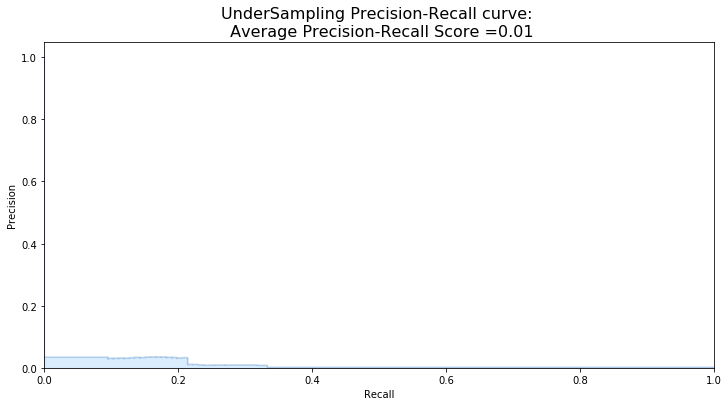

In [57]:
################## Final Model for UnderSampled Dataset ################

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_curve, confusion_matrix, average_precision_score
import matplotlib.pyplot as plt

X = out_rem_ds.drop('Class', axis=1)
y = out_rem_ds['Class']

undersample = RandomUnderSampler(sampling_strategy='majority')

X_train, X_test, y_train, y_test = train_test_split(X, y)

Xus_train, yus_train = undersample.fit_sample(X_train, y_train)

undersample_model = Sequential([
    Dense(INPUT_DIMENSION, input_dim=INPUT_DIMENSION, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# compile the keras model
undersample_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
undersample_model.fit(Xus_train, yus_train, epochs=10, batch_size=32)

# evaluate the keras model
_, accuracy = undersample_model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

undersample_predictions = undersample_model.predict(X_test).round()

undersample_probs = undersample_model.predict_proba(X_test)

print(f'> Accuracy: {undersample_scores[1]}')
print(f'> Loss: {undersample_scores[0]}')
print(f'> Precision: {precision_score(y_test, undersample_predictions)}')
print(f'> Recall: {recall_score(y_test, undersample_predictions)}')
print(f'> F-Score: {f1_score(y_test, undersample_predictions)}')

undersample_average_precision = average_precision_score(y_test, undersample_probs)

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, undersample_probs)

plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(undersample_average_precision), fontsize=16)

Train on 425524 samples
Epoch 1/12
425524/425524 [==============================] - 94s 222us/sample - loss: 6.7111 - acc: 0.8794
Epoch 2/12
425524/425524 [==============================] - 105s 247us/sample - loss: 0.1536 - acc: 0.9510
Epoch 3/12
425524/425524 [==============================] - 113s 266us/sample - loss: 0.1318 - acc: 0.9594
Epoch 4/12
425524/425524 [==============================] - 131s 307us/sample - loss: 0.1203 - acc: 0.9628
Epoch 5/12
425524/425524 [==============================] - 96s 225us/sample - loss: 0.1220 - acc: 0.9631
Epoch 6/12
425524/425524 [==============================] - 103s 242us/sample - loss: 0.1113 - acc: 0.9668
Epoch 7/12
425524/425524 [==============================] - 102s 240us/sample - loss: 0.1062 - acc: 0.9662
Epoch 8/12
425524/425524 [==============================] - 96s 227us/sample - loss: 0.1049 - acc: 0.9672
Epoch 9/12
425524/425524 [==============================] - 98s 231us/sample - loss: 0.0989 - acc: 0.9686
Epoch 10/12
42552

Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.68')

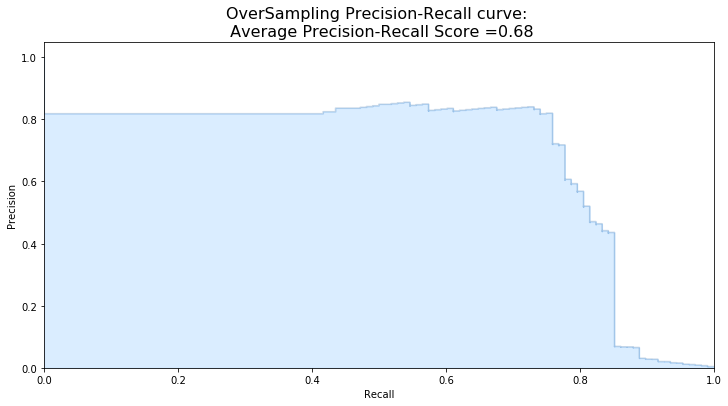

In [58]:
################## Final Model for OverSampled Dataset ################

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, confusion_matrix, average_precision_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

X = out_rem_ds.drop('Class', axis=1)
y = out_rem_ds['Class']

sm = SMOTE(sampling_strategy='minority', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y)

Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)

oversample_model = Sequential([
    Dense(INPUT_DIMENSION, input_dim=INPUT_DIMENSION, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

oversample_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

oversample_model.fit(Xsm_train, ysm_train, batch_size=10, epochs=12)

oversample_predictions = oversample_model.predict(X_test).round()

oversample_probs = oversample_model.predict_proba(X_test)

print(f'> Accuracy: {oversample_scores[1]}')
print(f'> Loss: {oversample_scores[0]}')
print(f'> Precision: {precision_score(y_test, oversample_predictions)}')
print(f'> Recall: {recall_score(y_test, oversample_predictions)}')
print(f'> F-Score: {f1_score(y_test, oversample_predictions)}')

oversample_average_precision = average_precision_score(y_test, oversample_probs)

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, oversample_probs)

plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(oversample_average_precision), fontsize=16)